In [41]:
import os
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#load datasets

airbnb_crime = pd.read_csv(r'C:\Madhuri\projects\ML_project\Test_ML\cleaned_airbnb_crime - Final.csv')


In [42]:
airbnb_crime

,id,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude,price,...,distance_to_rockefeller_center,distance_to_one_world_trade_center,distance_to_broadway,distance_to_grand_central_terminal,distance_to_the_metropolitan_museum_of_art,distance_to_american_museum_of_natural_history,distance_to_9/11_memorial_and_museum,distance_to_fifth_avenue,distance_to_chrysler_building,distance_to_the_high_line
0,2595,2019-07-14,0.39,2,288,Manhattan,Midtown,40.75362,-73.98377,225.0,...,0.712997,5.185197,0.602361,0.559866,3.350997,3.188791,5.306275,2.862444,0.745382,1.875920
1,3831,2019-07-26,4.64,1,212,Brooklyn,Clinton Hill,40.68514,-73.95976,89.0,...,8.337723,5.463919,8.473967,7.658067,10.489457,10.762152,5.387559,10.047648,7.511024,7.951725
2,5099,2019-07-21,0.60,1,127,Manhattan,Murray Hill,40.74767,-73.97500,200.0,...,1.269235,5.054090,1.492264,0.592728,3.668465,3.743125,5.160574,3.181790,0.443553,2.507579
3,5178,2019-07-13,3.48,1,239,Manhattan,Hell's Kitchen,40.76489,-73.98493,79.0,...,0.863289,6.274543,0.654852,1.500058,2.439538,2.046533,6.401993,2.001042,1.680229,2.514249
4,5203,2017-07-21,0.98,1,0,Manhattan,Upper West Side,40.80178,-73.96723,79.0,...,4.881868,10.636374,4.972348,5.519153,2.506988,2.344673,10.764653,2.937401,5.615359,6.764693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37598,37367709,2019-08-04,1.00,2,69,Brooklyn,Sheepshead Bay,40.59593,-73.95854,57.0,...,18.183091,13.788219,18.265163,17.506014,20.408902,20.655979,13.658443,19.964113,17.373164,17.352098
37599,37400191,2019-08-04,1.00,2,86,Brooklyn,Sheepshead Bay,40.59592,-73.95760,60.0,...,18.191771,13.816074,18.275926,17.514436,20.411707,20.662237,13.686549,19.967756,17.380905,17.371162
37600,37400410,2019-08-05,1.00,1,347,Brooklyn,Greenpoint,40.73467,-73.95131,229.0,...,3.532326,5.771222,3.889721,2.966297,5.078338,5.528165,5.830583,4.685936,2.766616,4.740789
37601,37416939,2019-08-15,2.00,1,1,Brooklyn,Bushwick,40.70497,-73.92173,60.0,...,7.666148,7.773487,8.003611,7.075935,8.988678,9.563753,7.759199,8.660100,6.879651,8.476059


In [43]:
airbnb_crime.dtypes

id                                                  int64
last_review                                        object
reviews_per_month                                 float64
calculated_host_listings_count                      int64
availability_365                                    int64
neighbourhood_group_cleansed                       object
neighbourhood_cleansed                             object
latitude                                          float64
longitude                                         float64
price                                             float64
minimum_nights                                      int64
number_of_reviews                                   int64
room_type                                          object
bedrooms                                          float64
bathrooms                                         float64
beds                                              float64
review_scores_rating                              float64
review_scores_

Train and Test split

In [44]:
from sklearn.model_selection import train_test_split
X = airbnb_crime.select_dtypes(include=[np.number]).drop(columns=['price'])
y = airbnb_crime['price']

In [45]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=10) # n_neighbours is a "hyperparameter", which can be changed to improve performance of the model
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('K-Nearest Neighbors Regressor Performance:')
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')    
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

K-Nearest Neighbors Regressor Performance:
R²: -0.0267
MAE: 79.6019
MSE: 26753.8188
RMSE: 163.5659


In [46]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Train metrics
knn_train_r2 = r2_score(y_train, y_train_pred)
knn_train_mae = mean_absolute_error(y_train, y_train_pred)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_train_rmse = np.sqrt(knn_train_mse)

# Test metrics
knn_test_r2 = r2_score(y_test, y_test_pred)
knn_test_mae = mean_absolute_error(y_test, y_test_pred)
knn_test_mse = mean_squared_error(y_test, y_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

# Create DataFrame
knn_results = pd.DataFrame(
    [[
        'K-Nearest Neighbors',
        knn_train_r2, knn_train_mae, knn_train_mse, knn_train_rmse,
        knn_test_r2, knn_test_mae, knn_test_mse, knn_test_rmse
    ]],
    columns=[
        'Model',
        'Train R2', 'Train MAE', 'Train MSE', 'Train RMSE',
        'Test R2', 'Test MAE', 'Test MSE', 'Test RMSE'
    ]
)

print(knn_results)

                 Model  Train R2  Train MAE     Train MSE  Train RMSE  \
0  K-Nearest Neighbors  0.129188  72.260395  36142.233868  190.111109   

    Test R2   Test MAE      Test MSE   Test RMSE  
0 -0.026662  79.601928  26753.818797  163.565946  


In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


print('\nLinear Regression Performance:')
print(f'R²: {r2_lr:.4f}')
print(f'MAE: {mae_lr:.4f}')
print(f'MSE: {mse_lr:.4f}')
print(f'RMSE: {rmse_lr:.4f}')



Linear Regression Performance:
R²: 0.3334
MAE: 57.9722
MSE: 17370.8100
RMSE: 131.7984


In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Train metrics
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_train_rmse = np.sqrt(lr_train_mse)

# Test metrics
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_test_rmse = np.sqrt(lr_test_mse)

# Create DataFrame
lr_results = pd.DataFrame(
    [[
        'Linear Regression',
        lr_train_r2, lr_train_mae, lr_train_mse, lr_train_rmse,
        lr_test_r2, lr_test_mae, lr_test_mse, lr_test_rmse
    ]],
    columns=[
        'Model',
        'Train R2', 'Train MAE', 'Train MSE', 'Train RMSE',
        'Test R2', 'Test MAE', 'Test MSE', 'Test RMSE'
    ]
)

print(lr_results)

               Model  Train R2  Train MAE     Train MSE  Train RMSE   Test R2  \
0  Linear Regression  0.155543  59.253996  35048.394892  187.212165  0.333406   

    Test MAE      Test MSE   Test RMSE  
0  57.972243  17370.809984  131.798369  


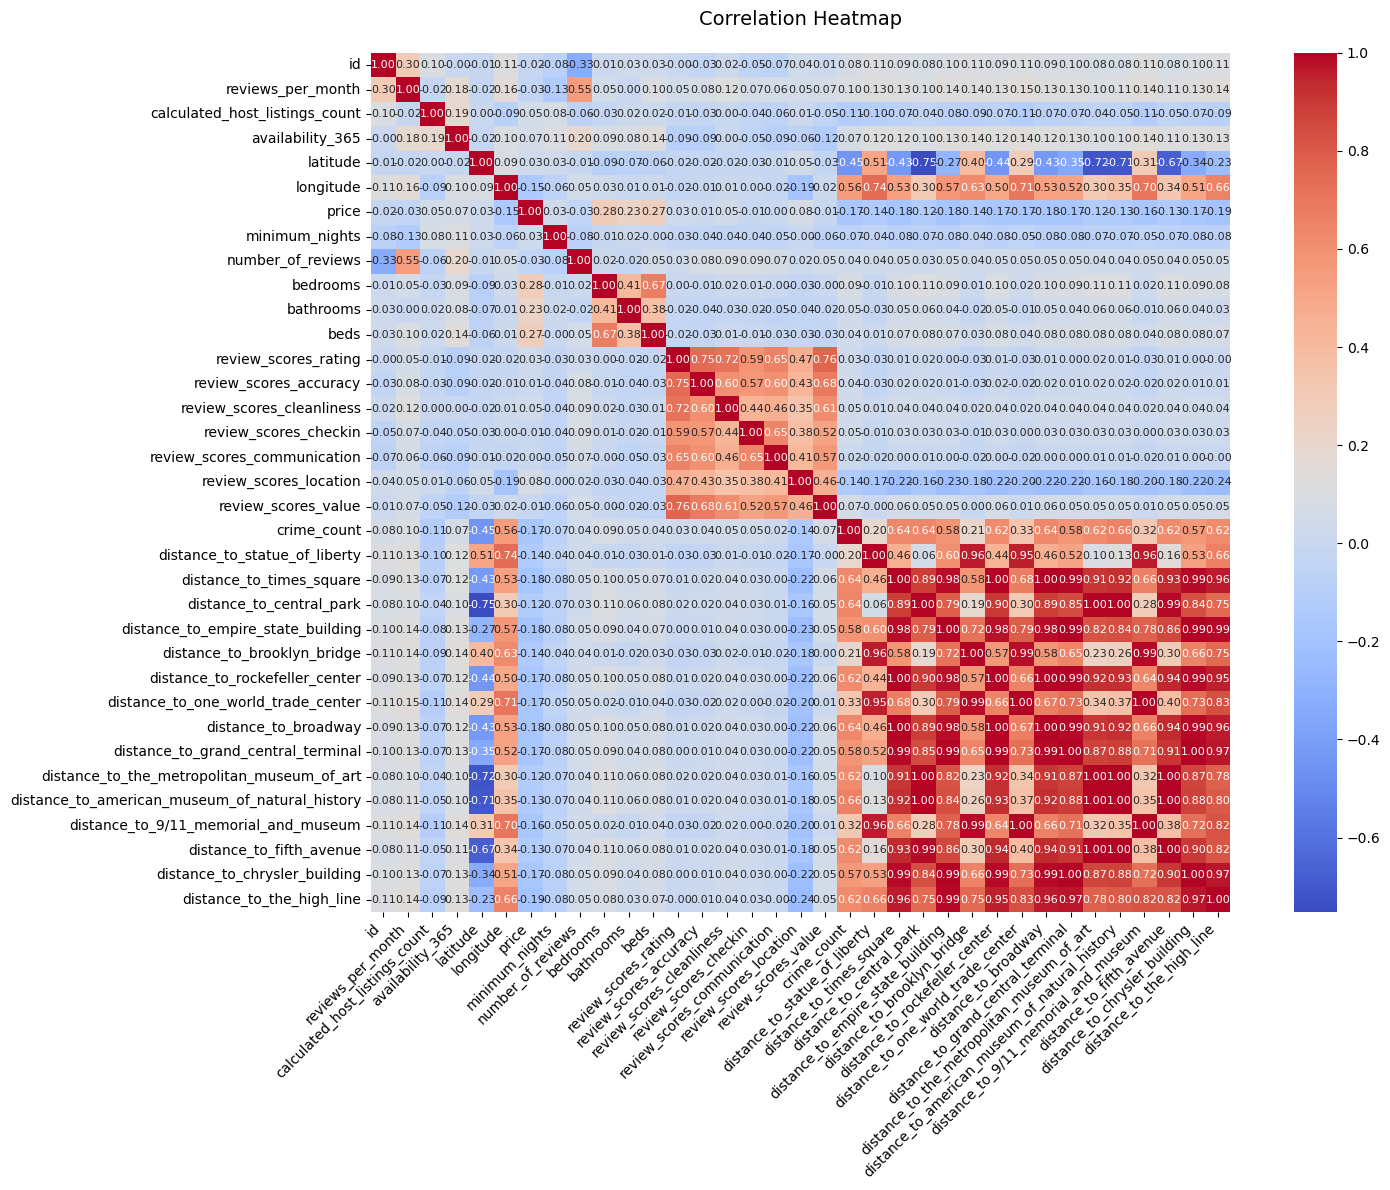

In [49]:
#Correlation Heatmap to visualize relationships between numeric features to select features for ML model

# Select numeric columns
numeric_cols = airbnb_crime.select_dtypes(include=[np.number])

# Compute correlations
corr = numeric_cols.corr()

# Set up figure size
plt.figure(figsize=(16, 12))

# Plot heatmap
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f",       # show 2 decimal places
    cmap="coolwarm", # color palette
    cbar=True, 
    square=True, 
    annot_kws={"size": 8}  # smaller font for annotations
)

# Rotate axis labels for clarity
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title("Correlation Heatmap", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
X = airbnb_crime[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'availability_365', 'crime_count',
               'calculated_host_listings_count', 'distance_to_statue_of_liberty', 'distance_to_times_square', 'neighbourhood_group_cleansed', 'room_type','bathrooms', 'bedrooms','reviews_per_month', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
               'review_scores_location', 'review_scores_value']]
y = airbnb_crime['price']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scalling

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numeric_features = ['latitude', 'longitude', 'minimum_nights', 
                    'number_of_reviews', 'availability_365', 'crime_count',
                    'calculated_host_listings_count', 
                    'distance_to_statue_of_liberty', 'distance_to_times_square','bathrooms', 'bedrooms','reviews_per_month', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
               'review_scores_location', 'review_scores_value']

scaler = MinMaxScaler()
scaler.fit(X_train[numeric_features])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Replace numeric columns with scaled versions
X_train_scaled[numeric_features] = scaler.transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [54]:
# Put transformed data into a DataFrame (only numeric features)
X_train_transformed = pd.DataFrame(scaler.transform(X_train[numeric_features]), columns=numeric_features, index=X_train.index)
X_test_transformed = pd.DataFrame(scaler.transform(X_test[numeric_features]), columns=numeric_features, index=X_test.index)

One hot encoding on neighbourhood group cleansed column

In [55]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(drop='first')
oh_encoder.fit(airbnb_crime.loc[X_train.index, ['neighbourhood_group_cleansed']])

X_train_encoded = pd.DataFrame.sparse.from_spmatrix(
    oh_encoder.transform(airbnb_crime.loc[X_train.index, ['neighbourhood_group_cleansed']]),
    columns=oh_encoder.get_feature_names_out(),
    index=X_train.index
)
X_test_encoded = pd.DataFrame.sparse.from_spmatrix(
    oh_encoder.transform(airbnb_crime.loc[X_test.index, ['neighbourhood_group_cleansed']]),
    columns=oh_encoder.get_feature_names_out(),
    index=X_test.index
)

X_train_encoded = pd.concat([X_train_encoded, X_train_transformed], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test_transformed], axis=1)

Mapping on room type column

In [56]:
# Define the mapping
room_type_map = {
    'Entire home/apt': 4,
    'Hotel room': 3,
    'Private room': 2,
    'Shared room': 1
}

# Apply the mapping to training and test sets
X_train_label = X_train[['room_type']].replace(room_type_map)
X_test_label = X_test[['room_type']].replace(room_type_map)

# Combine with your other encoded features

X_train_t = pd.concat(
    [X_train_encoded.reset_index(drop=True),
     X_train_label.reset_index(drop=True)],
    axis=1
)

X_test_t = pd.concat(
    [X_test_encoded.reset_index(drop=True),
     X_test_label.reset_index(drop=True)],
    axis=1
)



C:\Users\Naveen\AppData\Local\Temp\ipykernel_5308\3696907422.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_label = X_train[['room_type']].replace(room_type_map)
C:\Users\Naveen\AppData\Local\Temp\ipykernel_5308\3696907422.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_label = X_test[['room_type']].replace(room_type_map)


KNN

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=160)
knn.fit(X_train_t, y_train)
y_pred = knn.predict(X_test_t)
knn.score(X_test_t, y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("KNN Regression Results")
print("Score: {}".format(knn.score(X_test_t, y_test)))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KNN Regression Results


c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Score: 0.3447345240481764
Mean Squared Error: 17075.58854057597
Mean Absolute Error: 47.85410683419759
Root Mean Absolute Error: 130.6735954222427
R2 score: 0.3447345240481764


In [58]:
knn = KNeighborsRegressor(n_neighbors=160)
knn.fit(X_train_t, y_train)

# Predictions
y_train_pred = knn.predict(X_train_t)
y_test_pred = knn.predict(X_test_t)

# Train metrics
knn_train_r2 = r2_score(y_train, y_train_pred)
knn_train_mae = mean_absolute_error(y_train, y_train_pred)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_train_rmse = np.sqrt(knn_train_mse)

# Test metrics
knn_test_r2 = r2_score(y_test, y_test_pred)
knn_test_mae = mean_absolute_error(y_test, y_test_pred)
knn_test_mse = mean_squared_error(y_test, y_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

# Create DataFrame
knn_results = pd.DataFrame(
    [[
        'KNN Regression',
        knn_train_r2, knn_train_mae, knn_train_mse, knn_train_rmse,
        knn_test_r2, knn_test_mae, knn_test_mse, knn_test_rmse
    ]],
    columns=[
        'Model',
        'Train R2', 'Train MAE', 'Train MSE', 'Train RMSE',
        'Test R2', 'Test MAE', 'Test MSE', 'Test RMSE'
    ]
)

print(knn_results)

c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


            Model  Train R2  Train MAE     Train MSE  Train RMSE   Test R2  \
0  KNN Regression  0.180343  48.064988  34019.090486  184.442648  0.344735   

    Test MAE      Test MSE   Test RMSE  
0  47.854107  17075.588541  130.673595  


Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_t, y_train)

y_pred_lr = lr.predict(X_test_t)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)   # same as lr.score(X_test_t, y_test)

# Print results
print("Linear Regression Results")
print("Score: {}".format(lr.score(X_test_t, y_test)))
print("Mean Squared Error: {}".format(mse_lr))
print("Mean Absolute Error: {}".format(mae_lr)) 
print("Root Mean Squared Error: {}".format(rmse_lr))
print("R2 score: {}".format(r2_lr))



c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Linear Regression Results
Score: 0.3613034647104132
Mean Squared Error: 16643.817871000243
Mean Absolute Error: 52.79469209225983
Root Mean Squared Error: 129.0109215182972
R2 score: 0.3613034647104132


c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [60]:
lr = LinearRegression()
lr.fit(X_train_t, y_train)

# Predictions
y_train_pred_lr = lr.predict(X_train_t)
y_test_pred_lr = lr.predict(X_test_t)

# Train metrics
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_train_rmse = np.sqrt(lr_train_mse)

# Test metrics
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_test_rmse = np.sqrt(lr_test_mse)

# Create DataFrame
lr_results = pd.DataFrame(
    [[
        'Linear Regression',
        lr_train_r2, lr_train_mae, lr_train_mse, lr_train_rmse,
        lr_test_r2, lr_test_mae, lr_test_mse, lr_test_rmse
    ]],
    columns=[
        'Model',
        'Train R2', 'Train MAE', 'Train MSE', 'Train RMSE',
        'Test R2', 'Test MAE', 'Test MSE', 'Test RMSE'
    ]
)

print(lr_results)

               Model  Train R2  Train MAE     Train MSE  Train RMSE   Test R2  \
0  Linear Regression  0.171542  53.939095  34384.359414  185.430201  0.361303   

    Test MAE      Test MSE   Test RMSE  
0  52.794692  16643.817871  129.010922  


c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(
    max_depth=10, # 30, 50, 100 - we can have many more splits when we have continuous variables
    min_samples_split=2,
    max_leaf_nodes=30 # basically equivalent to max_depth but still considered
)


dt_reg.fit(X_train_t, y_train)

y_pred_dt = dt_reg.predict(X_test_t)

r2_dt = dt_reg.score(X_test_t, y_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("Decision Tree Regression Results")
print("Score: {}".format(dt_reg.score(X_test_t, y_test)))
print("Mean Squared Error: {}".format(mse_dt))
print("Mean Absolute Error: {}".format(mae_dt)) 
print("Root Mean Absolute Error: {}".format(rmse_dt))
print("R2 score: {}".format(r2_dt))

c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Decision Tree Regression Results
Score: -0.5838378851783064
Mean Squared Error: 41273.293092384985
Mean Absolute Error: 54.315465468123804
Root Mean Absolute Error: 203.15829565239267
R2 score: -0.5838378851783064


c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [62]:
dt_reg = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=2,
    max_leaf_nodes=30
)
dt_reg.fit(X_train_t, y_train)

# Predictions
y_train_pred_dt = dt_reg.predict(X_train_t)
y_test_pred_dt = dt_reg.predict(X_test_t)

# Train metrics
dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_train_mae = mean_absolute_error(y_train, y_train_pred_dt)
dt_train_mse = mean_squared_error(y_train, y_train_pred_dt)
dt_train_rmse = np.sqrt(dt_train_mse)

# Test metrics
dt_test_r2 = r2_score(y_test, y_test_pred_dt)
dt_test_mae = mean_absolute_error(y_test, y_test_pred_dt)
dt_test_mse = mean_squared_error(y_test, y_test_pred_dt)
dt_test_rmse = np.sqrt(dt_test_mse)

# Create DataFrame
dt_results = pd.DataFrame(
    [[
        'Decision Tree Regression',
        dt_train_r2, dt_train_mae, dt_train_mse, dt_train_rmse,
        dt_test_r2, dt_test_mae, dt_test_mse, dt_test_rmse
    ]],
    columns=[
        'Model',
        'Train R2', 'Train MAE', 'Train MSE', 'Train RMSE',
        'Test R2', 'Test MAE', 'Test MSE', 'Test RMSE'
    ]
)

print(dt_results)

c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


                      Model  Train R2  Train MAE     Train MSE  Train RMSE  \
0  Decision Tree Regression  0.484802  48.908295  21382.802297  146.228596   

    Test R2   Test MAE      Test MSE   Test RMSE  
0 -0.496081  53.954299  38986.428033  197.449811  


c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_boot = RandomForestRegressor(n_estimators=50, max_depth=10, bootstrap=True, random_state=42)
rf_boot.fit(X_train_t, y_train)

y_pred_rf = rf_boot.predict(X_test_t)

# Metrics
r2_rf = rf_boot.score(X_test_t, y_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Results
print("Random Forest Regression Results")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")


c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Random Forest Regression Results
R² Score: 0.3814
Mean Squared Error: 16119.3882
Mean Absolute Error: 45.4416
Root Mean Squared Error: 126.9622


c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Drop columns not useful for prediction (IDs, text)
X = airbnb_crime.drop(columns=['id','price','last_review'])  # keep features
y = airbnb_crime['price']  # target variable

# Handle missing values (replace NaN with median)
X = X.fillna(X.median(numeric_only=True))

# Convert categorical variables to dummies (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define model
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression Results")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")



XGBoost Regression Results
MSE: 13886.09
RMSE: 117.84
MAE: 42.78
R² Score: 0.467


In [65]:
# Transform price with log1p (handles zeros safely)
y_log = np.log1p(airbnb_crime['price'])

from sklearn.model_selection import train_test_split

X = airbnb_crime.drop(columns=['id','price','last_review'])
X = X.fillna(X.median(numeric_only=True))
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

import xgboost as xgb

model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# If you want to evaluate
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print("XGBoost Regression Results (with log-transformed target)")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")



XGBoost Regression Results (with log-transformed target)
MSE: 11411.11
RMSE: 106.82
MAE: 37.27
R² Score: 0.562


Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [67]:
print("Train R^2:", lasso.score(X_train, y_train))
print("Test R^2:", lasso.score(X_test, y_test))
print("Coefficients:", lasso.coef_)

Train R^2: 0.42977931178426454
Test R^2: 0.45102736077167227
Coefficients: [-0.00000000e+00  3.31424541e-04  4.76360788e-04 -0.00000000e+00
 -0.00000000e+00 -6.93538850e-04 -4.41770633e-04  0.00000000e+00
  0.00000000e+00  1.35913583e-01  5.87186955e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -8.81415294e-07 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.69283558e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.09572217e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+0

In [68]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Lasso Regression ')
print("Train R2: {}".format(r2_train))
print("Test R2: {}".format(r2_test))        
print("Train MSE: {}, RMSE: {}, MAE: {}".format(train_mse, train_rmse, train_mae))
print("Test MSE: {}, RMSE: {}, MAE: {}".format(test_mse, test_rmse, test_mae))  

Lasso Regression 
Train R2: 0.42977931178426454
Test R2: 0.45102736077167227
Train MSE: 0.2439881772649117, RMSE: 0.4939515940503803, MAE: 0.3708056089404801
Test MSE: 0.2414368550547489, RMSE: 0.49136224423000685, MAE: 0.37169482901852113


In [69]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Train metrics
lasso_train_r2 = r2_score(y_train, y_train_pred)
lasso_train_mae = mean_absolute_error(y_train, y_train_pred)
lasso_train_mse = mean_squared_error(y_train, y_train_pred)
lasso_train_rmse = np.sqrt(lasso_train_mse)

# Test metrics
lasso_test_r2 = r2_score(y_test, y_test_pred)
lasso_test_mae = mean_absolute_error(y_test, y_test_pred)
lasso_test_mse = mean_squared_error(y_test, y_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

# Create DataFrame
lasso_results = pd.DataFrame(
    [[
        'Lasso Regression',
        lasso_train_r2, lasso_train_mae, lasso_train_mse, lasso_train_rmse,
        lasso_test_r2, lasso_test_mae, lasso_test_mse, lasso_test_rmse
    ]],
    columns=[
        'Model',
        'Train R2', 'Train MAE', 'Train MSE', 'Train RMSE',
        'Test R2', 'Test MAE', 'Test MSE', 'Test RMSE'
    ]
)

print(lasso_results)

              Model  Train R2  Train MAE  Train MSE  Train RMSE   Test R2  \
0  Lasso Regression  0.429779   0.370806   0.243988    0.493952  0.451027   

   Test MAE  Test MSE  Test RMSE  
0  0.371695  0.241437   0.491362  


In [70]:
airbnb_models = pd.concat([knn_results, lr_results, dt_results, lasso_results], axis=0)
airbnb_models

,Model,Train R2,Train MAE,Train MSE,Train RMSE,Test R2,Test MAE,Test MSE,Test RMSE
0,KNN Regression,0.180343,48.064988,34019.090486,184.442648,0.344735,47.854107,17075.588541,130.673595
0,Linear Regression,0.171542,53.939095,34384.359414,185.430201,0.361303,52.794692,16643.817871,129.010922
0,Decision Tree Regression,0.484802,48.908295,21382.802297,146.228596,-0.496081,53.954299,38986.428033,197.449811
0,Lasso Regression,0.429779,0.370806,0.243988,0.493952,0.451027,0.371695,0.241437,0.491362


In [71]:
airbnb_models.reset_index(drop=True)

,Model,Train R2,Train MAE,Train MSE,Train RMSE,Test R2,Test MAE,Test MSE,Test RMSE
0,KNN Regression,0.180343,48.064988,34019.090486,184.442648,0.344735,47.854107,17075.588541,130.673595
1,Linear Regression,0.171542,53.939095,34384.359414,185.430201,0.361303,52.794692,16643.817871,129.010922
2,Decision Tree Regression,0.484802,48.908295,21382.802297,146.228596,-0.496081,53.954299,38986.428033,197.449811
3,Lasso Regression,0.429779,0.370806,0.243988,0.493952,0.451027,0.371695,0.241437,0.491362


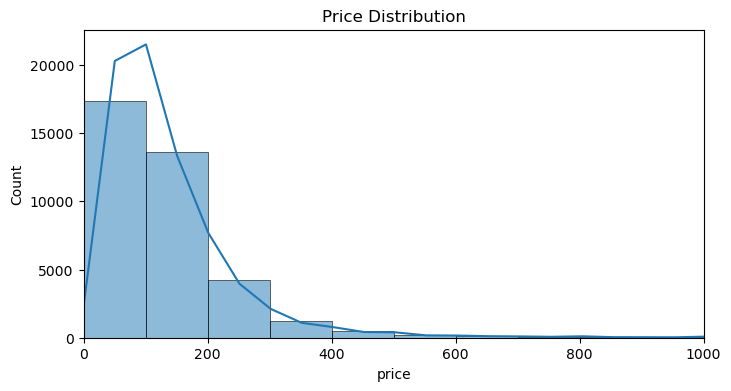

In [72]:
plt.figure(figsize=(8,4))
sns.histplot(airbnb_crime['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # zoom to remove outliers
plt.title("Price Distribution")
plt.show()

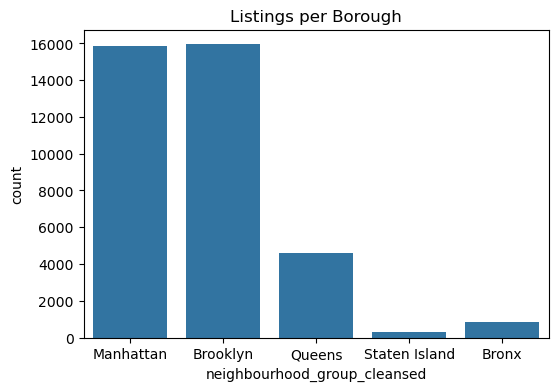

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(x='neighbourhood_group_cleansed', data=airbnb_crime)
plt.title("Listings per Borough")
plt.show()

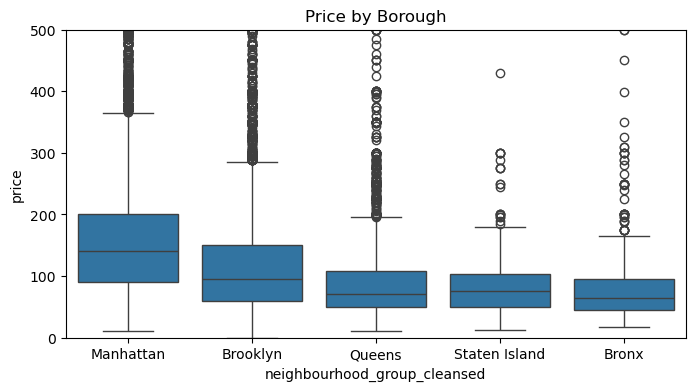

In [74]:
plt.figure(figsize=(8,4))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=airbnb_crime)
plt.ylim(0, 500)
plt.title("Price by Borough")
plt.show()

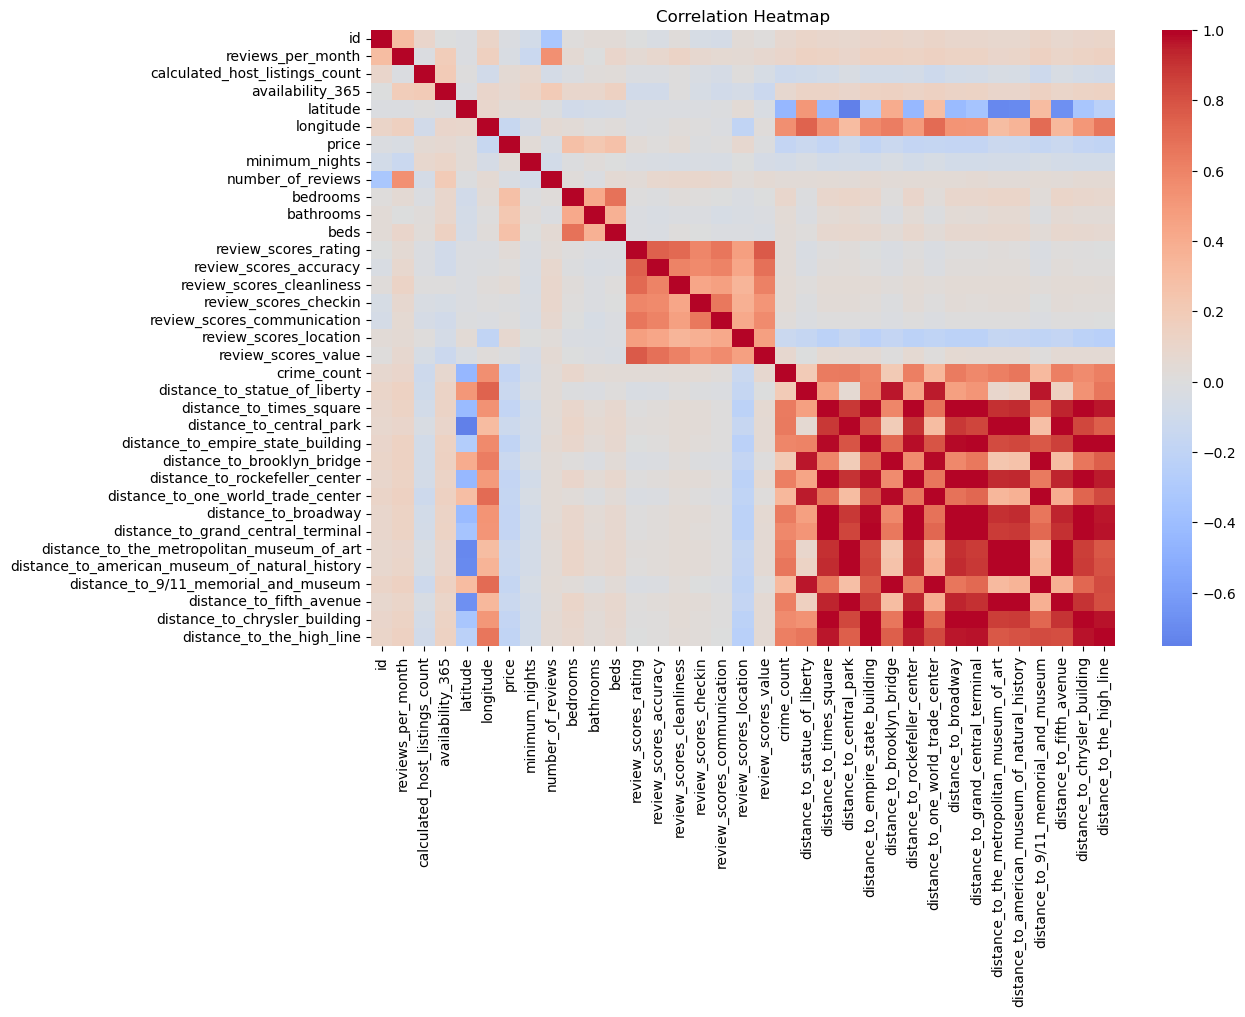

In [75]:
num_cols =airbnb_crime.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
sns.heatmap(airbnb_crime[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

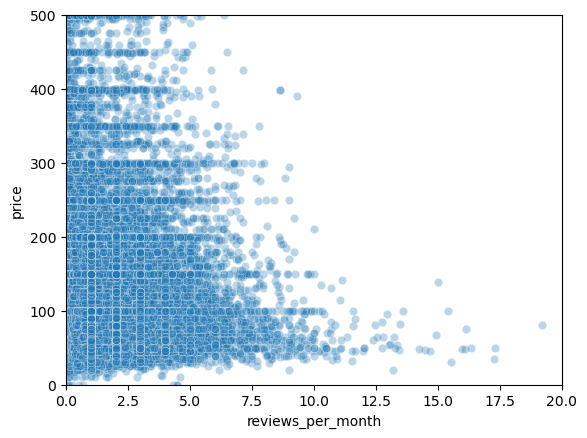

In [81]:
sns.scatterplot(x='reviews_per_month', y='price', data=airbnb_crime, alpha=0.3)
plt.ylim(0,500)
plt.xlim(0,20)
plt.show()

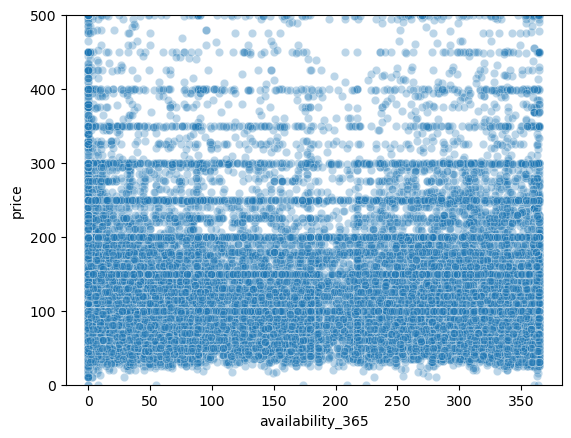

In [77]:
sns.scatterplot(x='availability_365', y='price', data=airbnb_crime, alpha=0.3)
plt.ylim(0,500)
plt.show()


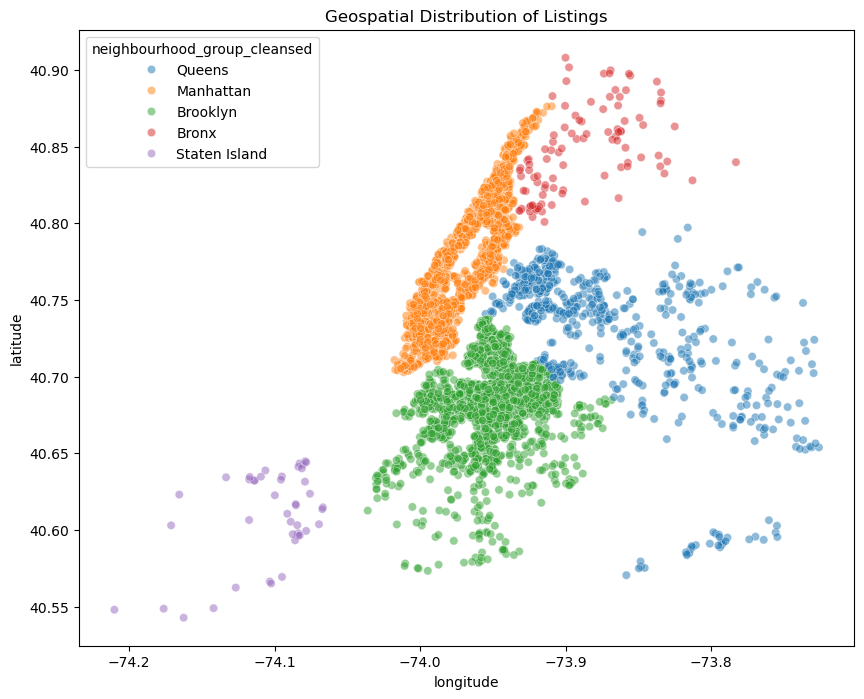

In [78]:
sample = airbnb_crime.sample(5000, random_state=42)
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed', data=sample, alpha=0.5)
plt.title("Geospatial Distribution of Listings")
plt.show()